<a href="https://colab.research.google.com/github/cjakuc/DS-Unit1-Build-Week/blob/master/Notebooks/Unit1BuildWeek_weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pyplot
import seaborn as sns

In [2]:
# Read in CSV files for 2005-2015
csv2005 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2005.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2006 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2006.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2007 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2007.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2008 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2008.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2009 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2009.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2010 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2010.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2011 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2011.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2012 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2012.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2013 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2013.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2014 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2014.csv?raw=true',
                      parse_dates=True,index_col=1)
csv2015 = pd.read_csv('https://github.com/cjakuc/DS-Unit1-Build-Week/blob/master/Weather%20Data/jmc2015.csv?raw=true',
                      parse_dates=True,index_col=1)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,15,17,20,23,36,37,41,42,48,49,51,111) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,17,18) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,62,64,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,13,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, co

In [3]:
csv2005.shape

(14713, 122)

In [4]:
csv2005.head()

,STATION,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,SOURCE,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,HourlyPresentWeatherType,HourlyPressureChange,HourlyPressureTendency,HourlyRelativeHumidity,HourlySkyConditions,HourlySeaLevelPressure,HourlyStationPressure,HourlyVisibility,HourlyWetBulbTemperature,HourlyWindDirection,HourlyWindGustSpeed,HourlyWindSpeed,Sunrise,Sunset,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,...,DSNW,HDSD,HTDD,NormalsCoolingDegreeDay,NormalsHeatingDegreeDay,ShortDurationEndDate005,ShortDurationEndDate010,ShortDurationEndDate015,ShortDurationEndDate020,ShortDurationEndDate030,ShortDurationEndDate045,ShortDurationEndDate060,ShortDurationEndDate080,ShortDurationEndDate100,ShortDurationEndDate120,ShortDurationEndDate150,ShortDurationEndDate180,ShortDurationPrecipitationValue005,ShortDurationPrecipitationValue010,ShortDurationPrecipitationValue015,ShortDurationPrecipitationValue020,ShortDurationPrecipitationValue030,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,REM,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,WindEquipmentChangeDate
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:44:00,72429093815,39.9064,-84.2185,305.7,"DAYTON INTERNATIONAL AIRPORT, OH US",FM-16,7,30.29,50,50,NaN,BR:1 ||,NaN,NaN,100,OVC:08 3,NaN,29.21,1.00,50,220,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET10101/01/05 00:45:59 SPECI KDAY 010544Z 220...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:56:00,72429093815,39.9064,-84.2185,305.7,"DAYTON INTERNATIONAL AIRPORT, OH US",FM-15,7,30.3,50,50,0.00,BR:1 ||,-0.01,0.0,100,OVC:08 3,30.3,29.22,2.00,50,230,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET11301/01/05 00:56:00 METAR KDAY 010556Z 230...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00,72429093815,39.9064,-84.2185,305.7,"DAYTON INTERNATIONAL AIRPORT, OH US",FM-12,4,NaN,50,50,NaN,NaN,-0.01,0.0,100,NaN,30.3,29.22,1.99,50,230,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SYN098AAXX 01064 72429 31132 82309 10100 2010...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:11:00,72429093815,39.9064,-84.2185,305.7,"DAYTON INTERNATIONAL AIRPORT, OH US",FM-16,7,30.3,52,52,NaN,BR:1 ||,NaN,NaN,100,OVC:08 3,NaN,29.22,3.00,52,230,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MET09001/01/05 01:11:00 SPECI KDAY 010611Z 230...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:20:00,72429093815,39.9064,-84.2185,305.7,"DAYTON INTERNATIONAL AIRPORT, OH US",FM-16,7,30.3,52,52,NaN,BR:1 ||,NaN,NaN,100,OVC:08 3,NaN,29.22,2.00,52,240,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [5]:
# Put all CSVs into one df
df_full = pd.concat([csv2005,
                csv2006,
                csv2007,
                csv2008,
                csv2009,
                csv2010,
                csv2011,
                csv2012,
                csv2013,
                csv2014,
                csv2015])
print(df_full.shape)
df_full.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  # This is added back by InteractiveShellApp.init_path()


(153663, 122)


,AWND,BackupDirection,BackupDistance,BackupDistanceUnit,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,CDSD,CLDD,DSNW,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,DailyWeather,ELEVATION,HDSD,HTDD,HourlyAltimeterSetting,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyPrecipitation,...,MonthlyMinimumTemperature,MonthlySeaLevelPressure,MonthlyStationPressure,MonthlyTotalLiquidPrecipitation,MonthlyTotalSnowfall,MonthlyWetBulb,NAME,NormalsCoolingDegreeDay,NormalsHeatingDegreeDay,REM,REPORT_TYPE,SOURCE,STATION,ShortDurationEndDate005,ShortDurationEndDate010,ShortDurationEndDate015,ShortDurationEndDate020,ShortDurationEndDate030,ShortDurationEndDate045,ShortDurationEndDate060,ShortDurationEndDate080,ShortDurationEndDate100,ShortDurationEndDate120,ShortDurationEndDate150,ShortDurationEndDate180,ShortDurationPrecipitationValue005,ShortDurationPrecipitationValue010,ShortDurationPrecipitationValue015,ShortDurationPrecipitationValue020,ShortDurationPrecipitationValue030,ShortDurationPrecipitationValue045,ShortDurationPrecipitationValue060,ShortDurationPrecipitationValue080,ShortDurationPrecipitationValue100,ShortDurationPrecipitationValue120,ShortDurationPrecipitationValue150,ShortDurationPrecipitationValue180,Sunrise,Sunset,WindEquipmentChangeDate
DATE,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2005-01-01 00:44:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,30.29,50,50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,MET10101/01/05 00:45:59 SPECI KDAY 010544Z 220...,FM-16,7,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 00:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,30.3,50,50,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,MET11301/01/05 00:56:00 METAR KDAY 010556Z 230...,FM-15,7,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,NaN,50,50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,SYN098AAXX 01064 72429 31132 82309 10100 2010...,FM-12,4,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,30.3,52,52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,MET09001/01/05 01:11:00 SPECI KDAY 010611Z 230...,FM-16,7,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-01 01:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.7,NaN,NaN,30.3,52,52,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"DAYTON INTERNATIONAL AIRPORT, OH US",NaN,NaN,MET10801/01/05 01:20:00 SPECI KDAY 010620Z 240...,FM-16,7,72429093815,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [6]:
df_full.index.year.value_counts()

2005    14713
2006    14600
2014    14432
2013    14431
2008    14395
2007    14169
2015    14091
2011    13722
2012    13560
2009    13298
2010    12252
Name: DATE, dtype: int64

In [7]:
# Create year, month, day, timestamp, and season variables
df_full = df_full
df_full['year'] = df_full.index.year
df_full['month'] = df_full.index.month
df_full['date'] = df_full.index.dayofyear
df_full['timestamp'] = df_full.index.time
df_full['season'] = (df_full.index.month%12 + 3)//3
df_full['season'] = df_full['season'].replace({1:'winter',
                                     2:'spring',
                                     3:'summer',
                                     4:'fall'})
print(df_full.head(10))
print(df_full.tail(10))
print(df_full['season'].value_counts())

                     AWND  BackupDirection  ...  timestamp  season
DATE                                        ...                   
2005-01-01 00:44:00   NaN              NaN  ...   00:44:00  winter
2005-01-01 00:56:00   NaN              NaN  ...   00:56:00  winter
2005-01-01 01:00:00   NaN              NaN  ...   01:00:00  winter
2005-01-01 01:11:00   NaN              NaN  ...   01:11:00  winter
2005-01-01 01:20:00   NaN              NaN  ...   01:20:00  winter
2005-01-01 01:26:00   NaN              NaN  ...   01:26:00  winter
2005-01-01 01:43:00   NaN              NaN  ...   01:43:00  winter
2005-01-01 01:56:00   NaN              NaN  ...   01:56:00  winter
2005-01-01 02:56:00   NaN              NaN  ...   02:56:00  winter
2005-01-01 03:56:00   NaN              NaN  ...   03:56:00  winter

[10 rows x 127 columns]
                     AWND  BackupDirection  ...  timestamp  season
DATE                                        ...                   
2015-12-31 18:56:00   NaN            

In [8]:
df_full.index.minute.value_counts()

56    96317
0     26415
59     4223
54     1835
3       785
49      620
47      609
48      592
34      559
46      554
8       535
10      535
18      524
14      523
44      520
11      518
45      513
12      513
15      512
13      511
22      509
31      505
27      504
21      503
17      503
43      502
32      500
26      499
42      497
36      495
40      494
30      492
23      492
41      491
29      488
38      488
9       485
24      484
33      483
20      479
25      473
37      472
28      470
39      467
19      464
7       463
35      455
16      417
6       403
5       346
51      319
4       314
52      237
50      226
53      170
2       140
1       107
58      100
55        8
57        6
Name: DATE, dtype: int64

In [9]:
df_full.isnull().sum()

AWND                  153535
BackupDirection       153663
BackupDistance        153663
BackupDistanceUnit    153663
BackupElements        153663
                       ...  
year                       0
month                      0
date                       0
timestamp                  0
season                     0
Length: 127, dtype: int64

In [0]:
# Rename dry bulb temp to air temp
df_full = df_full.rename({'HourlyDryBulbTemperature':'HourlyAirTemp'},axis=1)

In [11]:
# Convert Hourly Air Temp to float
df_full['HourlyAirTemp'] = df_full['HourlyAirTemp'].apply(str)
df_full['HourlyAirTemp'] = df_full["HourlyAirTemp"].map(lambda x: x.rstrip('s*'))
df_full['HourlyAirTemp'] = df_full['HourlyAirTemp'].replace({'':'NaN'})
df_full['HourlyAirTemp'] = df_full['HourlyAirTemp'].apply(float)
df_full['HourlyAirTemp'].dtypes

dtype('float64')

In [12]:
# Turn the minute resolution to hourly using resample and mean
df_temp = df_full['HourlyAirTemp']
airtemp = df_temp.resample('H').mean()
airtemp.dtypes

dtype('float64')

In [20]:
airtemp.head()

DATE
2005-01-01 00:00:00    50.000000
2005-01-01 01:00:00    50.833333
2005-01-01 02:00:00    50.000000
2005-01-01 03:00:00    50.000000
2005-01-01 04:00:00    50.000000
Freq: H, Name: HourlyAirTemp, dtype: float64

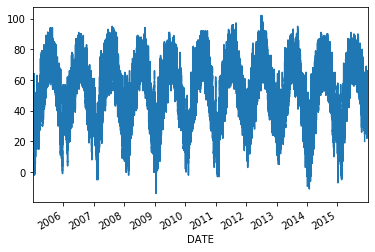

In [13]:
# Make plots to see if the data still looks the same
df_full['HourlyAirTemp'].plot();

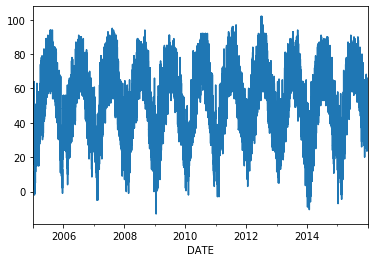

In [14]:
airtemp.plot();

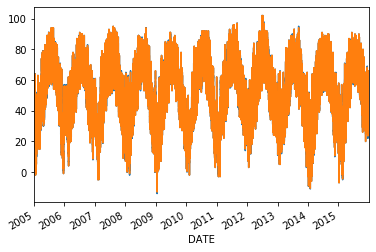

In [15]:
# Plot together
df_full['HourlyAirTemp'].plot();
airtemp.plot();

In [16]:
# Extract the daily temp averages and the heating/cooling degree days

df_daily = df_full[['DailyAverageDryBulbTemperature',
                    'DailyCoolingDegreeDays',
                    'DailyHeatingDegreeDays']]
# Rename Daily Average Air Temp
df_daily = df_daily.rename({'DailyAverageDryBulbTemperature':'DailyAvgAirTemp'},
                           axis=1)
# Drop the time of day
df_daily.index = df_daily.index.date
# Drop NaNs
df_daily = df_daily.dropna()
# Convert temp to float
df_daily['DailyAvgAirTemp'] = df_daily['DailyAvgAirTemp'].apply(str)
df_daily['DailyAvgAirTemp'] = df_daily['DailyAvgAirTemp'].map(lambda x: x.rstrip('s*'))
df_daily['DailyAvgAirTemp'] = df_daily['DailyAvgAirTemp'].replace({'':'NaN'})
df_daily['DailyAvgAirTemp'] = df_daily['DailyAvgAirTemp'].apply(float)
# Convert cooling degree days to float
df_daily['DailyCoolingDegreeDays'] = df_daily['DailyCoolingDegreeDays'].apply(str)
df_daily['DailyCoolingDegreeDays'] = df_daily['DailyCoolingDegreeDays'].map(lambda x: x.rstrip('s*'))
df_daily['DailyCoolingDegreeDays'] = df_daily['DailyCoolingDegreeDays'].replace({'':'NaN'})
df_daily['DailyCoolingDegreeDays'] = df_daily['DailyCoolingDegreeDays'].apply(float)
# Convert Heating degree days to float
df_daily['DailyHeatingDegreeDays'] = df_daily['DailyHeatingDegreeDays'].apply(str)
df_daily['DailyHeatingDegreeDays'] = df_daily['DailyHeatingDegreeDays'].map(lambda x: x.rstrip('s*'))
df_daily['DailyHeatingDegreeDays'] = df_daily['DailyHeatingDegreeDays'].replace({'':'NaN'})
df_daily['DailyHeatingDegreeDays'] = df_daily['DailyHeatingDegreeDays'].apply(float)

print(df_daily.head())

,DailyAvgAirTemp,DailyCoolingDegreeDays,DailyHeatingDegreeDays
2005-01-01,48.0,0.0,17.0
2005-01-02,52.0,0.0,13.0
2005-01-03,50.0,0.0,15.0
2005-01-04,40.0,0.0,25.0
2005-01-05,36.0,0.0,29.0


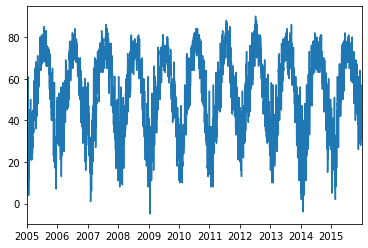

In [17]:
# Plot daily average temp
df_daily['DailyAvgAirTemp'].plot();

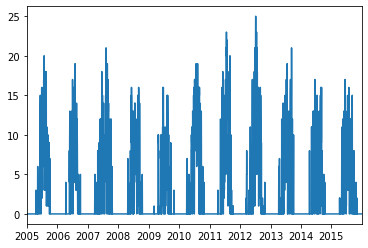

In [18]:
# Plot cooling degree days
df_daily['DailyCoolingDegreeDays'].plot();

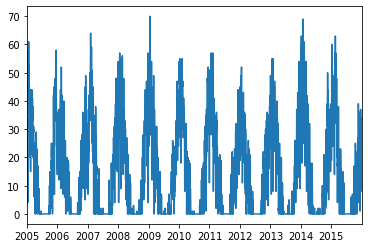

In [19]:
# Plot heating degree days
df_daily['DailyHeatingDegreeDays'].plot();

In [21]:
# Export dataframes as new CSVs
airtemp.to_csv('dayton_hourly_temp.csv')
df_daily.to_csv('dayton_daily_temp.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.
